In [1]:
from google.colab import files
uploaded = files.upload()


Saving ifood_df.csv to ifood_df.csv


In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV

# Load into a DataFrame
df = pd.read_csv("ifood_df.csv")
df.head()


Saving ifood_df.csv to ifood_df (1).csv


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
# Overview of the dataset
df.info()
df.describe()
df.isnull().sum()  # Check missing values

# Example: Handle missing values
df = df.dropna()  # Or fill with mean/median
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [8]:
# Calculate 'Frequency' as the sum of different purchase types
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Display the first few rows with the new 'Frequency' column
display(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Frequency']].head())

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency
0,3,8,10,4,25
1,2,1,1,2,6
2,1,8,2,10,21
3,2,2,0,4,8
4,5,5,3,6,19


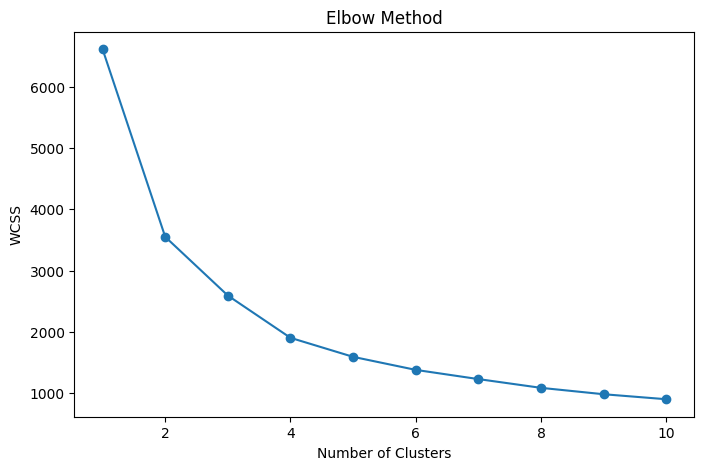

In [10]:
# Select features for clustering
features = df[['Recency', 'Frequency', 'MntTotal']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to choose optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Apply K-Means (choose k from elbow)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(scaled_features)

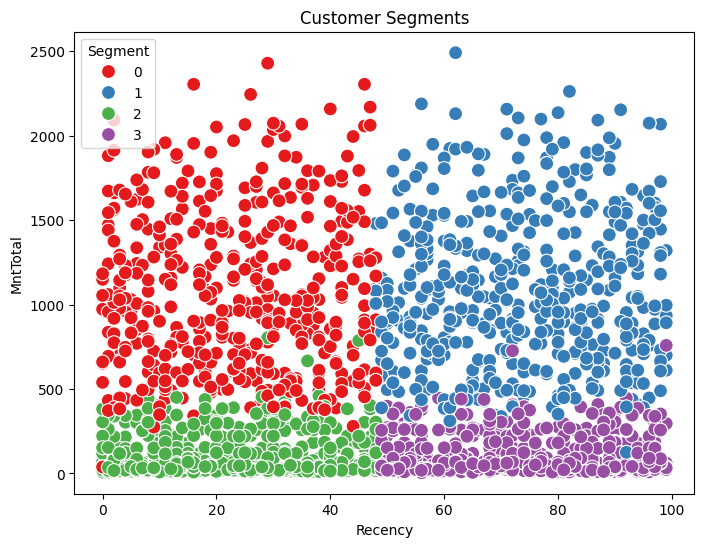

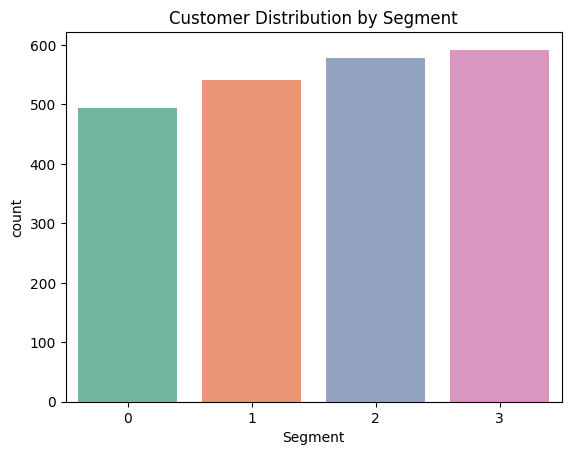

In [12]:
# Scatter plot: Recency vs Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='MntTotal', hue='Segment', data=df, palette='Set1', s=100)
plt.title('Customer Segments')
plt.show()

# Count of customers per segment
sns.countplot(x='Segment', data=df, palette='Set2')
plt.title('Customer Distribution by Segment')
plt.show()

In [14]:
# Segment summary
segment_summary = df.groupby('Segment')[['Recency','Frequency','MntTotal']].mean()
print(segment_summary)

# Example insights:
# Segment 0 → High Monetary, High Frequency → VIP Customers
# Segment 1 → Low Monetary, Low Frequency → Occasional Buyers
# Segment 2 → High Recency → Recently Active Customers
# Segment 3 → Low Recency → Dormant Customers

           Recency  Frequency     MntTotal
Segment                                   
0        23.082996  21.906883  1063.629555
1        72.975970  21.480591  1074.354898
2        23.494810   8.811419   114.923875
3        73.652027   8.939189   114.545608
